In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import json

In [22]:
df_discharge = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20250208.csv")
df_discharge.columns

/var/folders/z5/d2ytmy3d2h18qcqwb9v71w2m0000gq/T/ipykernel_8940/3966382078.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_discharge = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20250208.csv")


Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df_discharge.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,27,Emergency,Home w/ Home Health Services,2021,INF012,COVID-19,OTR004,ISOLATION PROCEDURES,137,MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS,4,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3,Major,Extreme,Medical,Medicare,Medicaid,NaN,NaN,Y,320922.43,60241.34
1,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,4,Emergency,Home or Self Care,2021,NVS005,Multiple sclerosis,NaN,NaN,43,"MULTIPLE SCLEROSIS, OTHER DEMYELINATING DISEAS...",1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2,Moderate,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,61665.22,9180.69
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Other Race,Spanish/Hispanic,2,Emergency,Home or Self Care,2021,PRG016,Previous C-section,PGN003,CESAREAN SECTION,540,CESAREAN SECTION WITHOUT STERILIZATION,14,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",1,Minor,Minor,Surgical,Medicaid,NaN,NaN,NaN,N,42705.34,11366.50
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,Other Race,Spanish/Hispanic,5,Emergency,Home or Self Care,2021,GEN004,Urinary tract infections,ADM017,ADMINISTRATION OF NUTRITIONAL AND ELECTROLYTIC...,463,KIDNEY AND URINARY TRACT INFECTIONS,11,DISEASES AND DISORDERS OF THE KIDNEY AND URINA...,3,Major,Major,Medical,Medicare,Medicaid,NaN,NaN,Y,72700.17,12111.75
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,Black/African American,Not Span/Hispanic,3,Emergency,Home or Self Care,2021,NVS008,Paralysis (other than cerebral palsy),CNS002,LUMBAR PUNCTURE,58,OTHER DISORDERS OF NERVOUS SYSTEM,1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2,Moderate,Minor,Medical,Medicare,Medicaid,NaN,NaN,Y,55562.51,8339.72


In [24]:
print(df_discharge.columns)
print(df_discharge['Type of Admission'].unique())

Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')
['Emergency' 'Newborn' 'Elective' 'Urgent' 'Trauma' 'Not Available']


In [41]:

# Load the SPARCS discharge data
df = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20250208.csv')

def analyze_hospital_disparities(df):
    # Convert numeric fields, handling errors
    df['Severity_Num'] = pd.to_numeric(df['APR Severity of Illness Code'], errors='coerce')
    df['Total_Costs'] = pd.to_numeric(df['Total Costs'], errors='coerce')
    df['Length_of_Stay'] = pd.to_numeric(df['Length of Stay'], errors='coerce')
    
    hospital_disparities = {}
    
    for facility_id in df['Permanent Facility Id'].unique():
        try:
            hospital_data = df[df['Permanent Facility Id'] == facility_id]
            
            if hospital_data.empty:
                continue
                
            basic_info = hospital_data.iloc[0]
            
            hospital_disparities[float(facility_id)] = {
                'name': basic_info['Facility Name'],
                'area': basic_info['Hospital Service Area'],
                'racial_disparities': analyze_demographic_disparities(hospital_data, 'Race'),
                'gender_disparities': analyze_demographic_disparities(hospital_data, 'Gender')
            }
            
        except Exception as e:
            print(f"Error processing facility {facility_id}: {str(e)}")
            continue
    
    return hospital_disparities

def analyze_demographic_disparities(hospital_data, demographic_col):
    metrics = {}
    
    for group in hospital_data[demographic_col].unique():
        group_data = hospital_data[hospital_data[demographic_col] == group]
        
        # Calculate all three types of disparities
        severity_admission = analyze_severity_admission_mismatch(group_data)
        los_metrics = analyze_length_of_stay(group_data)
        cost_metrics = analyze_costs(group_data)
        
        # Calculate Bias Score for the group
        bias_score = calculate_bias_score(severity_admission, los_metrics, cost_metrics)
        
        metrics[group] = {
            'severity_admission_mismatch': severity_admission,
            'length_of_stay': los_metrics,
            'cost_metrics': cost_metrics,
            'bias_score': bias_score,  # Add bias score to the metrics
            'patient_count': len(group_data)
        }
    
    return metrics

def analyze_severity_admission_mismatch(data):
    mismatch_metrics = {
        'high_severity_routine': 0,
        'low_severity_emergency': 0,
        'total_cases': len(data)
    }
    
    # Calculate mismatches
    high_severity_mask = (data['Severity_Num'] >= 3) & (data['Type of Admission'].isin(['Elective', 'Routine']))
    low_severity_mask = (data['Severity_Num'] <= 2) & (data['Type of Admission'] == 'Emergency')
    
    mismatch_metrics['high_severity_routine'] = high_severity_mask.sum()
    mismatch_metrics['low_severity_emergency'] = low_severity_mask.sum()
    
    # Calculate percentages
    if mismatch_metrics['total_cases'] > 0:
        mismatch_metrics['high_severity_routine_pct'] = (mismatch_metrics['high_severity_routine'] / mismatch_metrics['total_cases']) * 100
        mismatch_metrics['low_severity_emergency_pct'] = (mismatch_metrics['low_severity_emergency'] / mismatch_metrics['total_cases']) * 100
    
    return mismatch_metrics

def analyze_length_of_stay(data):
    los_metrics = {
        'overall': {
            'mean': float(data['Length_of_Stay'].mean()),
            'median': float(data['Length_of_Stay'].median())
        },
        'by_severity': {}
    }
    
    # Analyze LOS by severity level
    for severity in range(1, 5):
        severity_data = data[data['Severity_Num'] == severity]
        if len(severity_data) > 0:
            los_metrics['by_severity'][str(severity)] = {
                'mean': float(severity_data['Length_of_Stay'].mean()),
                'median': float(severity_data['Length_of_Stay'].median()),
                'case_count': len(severity_data)
            }
    
    return los_metrics

def analyze_costs(data):
    cost_metrics = {
        'overall': {
            'mean': float(data['Total_Costs'].mean()),
            'median': float(data['Total_Costs'].median())
        },
        'by_severity': {}
    }
    
    # Analyze costs by severity level
    for severity in range(1, 5):
        severity_data = data[data['Severity_Num'] == severity]
        if len(severity_data) > 0:
            cost_metrics['by_severity'][str(severity)] = {
                'mean': float(severity_data['Total_Costs'].mean()),
                'median': float(severity_data['Total_Costs'].median()),
                'case_count': len(severity_data)
            }
    
    return cost_metrics

def calculate_bias_score(severity_admission, los_metrics, cost_metrics):
    # Weight for each metric
    weight_severity_mismatch = 0.25
    weight_los = 0.50
    weight_cost = 0.50
    
    # Normalize Severity Mismatch score to be out of 100
    severity_score = abs(severity_admission['high_severity_routine_pct'] - severity_admission['low_severity_emergency_pct'])
    severity_max_score = 100  # Maximum possible mismatch percentage
    severity_score_normalized = (severity_score / severity_max_score) * 100
    
    # Normalize Length of Stay disparity score to be out of 100
    overall_los = los_metrics['overall']['mean']
    severity_los = sum([los_metrics['by_severity'][str(severity)]['mean'] for severity in los_metrics['by_severity']])
    los_max_score = max(abs(overall_los - severity_los / 4), overall_los)  # Max possible disparity
    los_score_normalized = (abs(overall_los - severity_los / 4) / los_max_score) * 100
    
    # Normalize Cost disparity score to be out of 100
    overall_cost = cost_metrics['overall']['mean']
    severity_cost = sum([cost_metrics['by_severity'][str(severity)]['mean'] for severity in cost_metrics['by_severity']])
    cost_max_score = max(abs(overall_cost - severity_cost / 4), overall_cost)  # Max possible disparity
    cost_score_normalized = (abs(overall_cost - severity_cost / 4) / cost_max_score) * 100
    
    # Combine scores with the specified weights
    bias_score = (weight_severity_mismatch * severity_score_normalized) + \
                 (weight_los * los_score_normalized) + \
                 (weight_cost * cost_score_normalized)
    
    return bias_score

# Run the analysis
hospital_disparities = analyze_hospital_disparities(df)

# Function to recursively convert pandas types to native Python types
def convert_pandas_types(data):
    if isinstance(data, dict):
        return {key: convert_pandas_types(value) for key, value in data.items()}
    elif isinstance(data, list):
        return [convert_pandas_types(item) for item in data]
    elif isinstance(data, np.int64):
        return int(data)
    elif isinstance(data, np.float64):
        return float(data)
    else:
        return data

# Convert the hospital_disparities data before saving it to JSON
hospital_disparities_converted = convert_pandas_types(hospital_disparities)

# Save results to JSON using the custom encoder
with open('hospital_disparities.json', 'w') as f:
    json.dump(hospital_disparities_converted, f, indent=2)

# Print example analysis for one hospital
first_hospital = list(hospital_disparities_converted.keys())[0]
print(f"\nDetailed Analysis for {hospital_disparities_converted[first_hospital]['name']}:")
print("\nRacial Disparities:")
print(json.dumps(hospital_disparities_converted[first_hospital]['racial_disparities'], indent=2))
print("\nGender Disparities:")
print(json.dumps(hospital_disparities_converted[first_hospital]['gender_disparities'], indent=2))

/var/folders/z5/d2ytmy3d2h18qcqwb9v71w2m0000gq/T/ipykernel_8940/3731436955.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20250208.csv')



Detailed Analysis for Montefiore Medical Center - Henry & Lucy Moses Div:

Racial Disparities:
{
  "Other Race": {
    "severity_admission_mismatch": {
      "high_severity_routine": 423,
      "low_severity_emergency": 9896,
      "total_cases": 19617,
      "high_severity_routine_pct": 2.1562930111637866,
      "low_severity_emergency_pct": 50.44604169852679
    },
    "length_of_stay": {
      "overall": {
        "mean": 5.857325035706999,
        "median": 3.0
      },
      "by_severity": {
        "1": {
          "mean": 2.191872219975738,
          "median": 2.0,
          "case_count": 4946
        },
        "2": {
          "mean": 4.033328665453018,
          "median": 3.0,
          "case_count": 7141
        },
        "3": {
          "mean": 7.24564975934839,
          "median": 5.0,
          "case_count": 5403
        },
        "4": {
          "mean": 17.05584477046853,
          "median": 12.0,
          "case_count": 2125
        }
      }
    },
    "cost_metri

In [47]:
# Load the SPARCS discharge data
df = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20250208.csv')

def analyze_hospital_disparities(df):
    # Convert numeric fields, handling errors
    df['Severity_Num'] = pd.to_numeric(df['APR Severity of Illness Code'], errors='coerce')
    df['Total_Costs'] = pd.to_numeric(df['Total Costs'], errors='coerce')
    df['Length_of_Stay'] = pd.to_numeric(df['Length of Stay'], errors='coerce')
    
    hospital_disparities = {}
    
    for facility_id in df['Permanent Facility Id'].unique():
        try:
            hospital_data = df[df['Permanent Facility Id'] == facility_id]
            
            if hospital_data.empty:
                continue
                
            basic_info = hospital_data.iloc[0]
            
            hospital_disparities[float(facility_id)] = {
                'name': basic_info['Facility Name'],
                'area': basic_info['Hospital Service Area'],
                'racial_disparities': analyze_demographic_disparities(hospital_data, 'Race'),
                'gender_disparities': analyze_demographic_disparities(hospital_data, 'Gender')
            }
            
        except Exception as e:
            print(f"Error processing facility {facility_id}: {str(e)}")
            continue
    
    return hospital_disparities

def analyze_demographic_disparities(hospital_data, demographic_col):
    metrics = {}
    
    for group in hospital_data[demographic_col].unique():
        group_data = hospital_data[hospital_data[demographic_col] == group]
        
        # Calculate all three types of disparities
        severity_admission = analyze_severity_admission_mismatch(group_data)
        los_metrics = analyze_length_of_stay(group_data)
        cost_metrics = analyze_costs(group_data)
        
        # Calculate Bias Score for the group
        bias_score = calculate_bias_score(severity_admission, los_metrics, cost_metrics)
        
        metrics[group] = {
            'severity_admission_mismatch': severity_admission,
            'length_of_stay': los_metrics,
            'cost_metrics': cost_metrics,
            'bias_score': bias_score,  # Add bias score to the metrics
            'patient_count': len(group_data)
        }
    
    return metrics

def analyze_severity_admission_mismatch(data):
    mismatch_metrics = {
        'high_severity_routine': 0,
        'low_severity_emergency': 0,
        'total_cases': len(data)
    }
    
    # Calculate mismatches
    high_severity_mask = (data['Severity_Num'] >= 3) & (data['Type of Admission'].isin(['Elective', 'Routine']))
    low_severity_mask = (data['Severity_Num'] <= 2) & (data['Type of Admission'] == 'Emergency')
    
    mismatch_metrics['high_severity_routine'] = high_severity_mask.sum()
    mismatch_metrics['low_severity_emergency'] = low_severity_mask.sum()
    
    # Calculate percentages
    if mismatch_metrics['total_cases'] > 0:
        mismatch_metrics['high_severity_routine_pct'] = (mismatch_metrics['high_severity_routine'] / mismatch_metrics['total_cases']) * 100
        mismatch_metrics['low_severity_emergency_pct'] = (mismatch_metrics['low_severity_emergency'] / mismatch_metrics['total_cases']) * 100
    
    return mismatch_metrics

def analyze_length_of_stay(data):
    los_metrics = {
        'overall': {
            'mean': float(data['Length_of_Stay'].mean()),
            'median': float(data['Length_of_Stay'].median())
        },
        'by_severity': {}
    }
    
    # Analyze LOS by severity level
    for severity in range(1, 5):
        severity_data = data[data['Severity_Num'] == severity]
        if len(severity_data) > 0:
            los_metrics['by_severity'][str(severity)] = {
                'mean': float(severity_data['Length_of_Stay'].mean()),
                'median': float(severity_data['Length_of_Stay'].median()),
                'case_count': len(severity_data)
            }
    
    return los_metrics

def analyze_costs(data):
    cost_metrics = {
        'overall': {
            'mean': float(data['Total_Costs'].mean()),
            'median': float(data['Total_Costs'].median())
        },
        'by_severity': {}
    }
    
    # Analyze costs by severity level
    for severity in range(1, 5):
        severity_data = data[data['Severity_Num'] == severity]
        if len(severity_data) > 0:
            cost_metrics['by_severity'][str(severity)] = {
                'mean': float(severity_data['Total_Costs'].mean()),
                'median': float(severity_data['Total_Costs'].median()),
                'case_count': len(severity_data)
            }
    
    return cost_metrics

def calculate_bias_score(severity_admission, los_metrics, cost_metrics):
    # Weight for each metric
    weight_severity_mismatch = 0.25
    weight_los = 0.50
    weight_cost = 0.50
    
    # Normalize Severity Mismatch score to be out of 100
    severity_score = abs(severity_admission['high_severity_routine_pct'] - severity_admission['low_severity_emergency_pct'])
    severity_max_score = 100  # Maximum possible mismatch percentage
    severity_score_normalized = (severity_score / severity_max_score) * 100
    
    # Normalize Length of Stay disparity score to be out of 100
    overall_los = los_metrics['overall']['mean']
    severity_los = sum([los_metrics['by_severity'][str(severity)]['mean'] for severity in los_metrics['by_severity']])
    los_max_score = max(abs(overall_los - severity_los / 4), overall_los)  # Max possible disparity
    los_score_normalized = (abs(overall_los - severity_los / 4) / los_max_score) * 100
    
    # Normalize Cost disparity score to be out of 100
    overall_cost = cost_metrics['overall']['mean']
    severity_cost = sum([cost_metrics['by_severity'][str(severity)]['mean'] for severity in cost_metrics['by_severity']])
    cost_max_score = max(abs(overall_cost - severity_cost / 4), overall_cost)  # Max possible disparity
    cost_score_normalized = (abs(overall_cost - severity_cost / 4) / cost_max_score) * 100
    
    # Reverse the scores so that higher bias results in a lower score
    bias_score = 100 - (weight_severity_mismatch * severity_score_normalized + 
                        weight_los * los_score_normalized + 
                        weight_cost * cost_score_normalized)
    
    return bias_score

# Run the analysis
hospital_disparities = analyze_hospital_disparities(df)

# Function to recursively convert pandas types to native Python types
def convert_pandas_types(data):
    if isinstance(data, dict):
        return {key: convert_pandas_types(value) for key, value in data.items()}
    elif isinstance(data, list):
        return [convert_pandas_types(item) for item in data]
    elif isinstance(data, np.int64):
        return int(data)
    elif isinstance(data, np.float64):
        return float(data)
    else:
        return data

# Convert the hospital_disparities data before saving it to JSON
hospital_disparities_converted = convert_pandas_types(hospital_disparities)

# Save results to JSON using the custom encoder
with open('hospital_disparities.json', 'w') as f:
    json.dump(hospital_disparities_converted, f, indent=2)



/var/folders/z5/d2ytmy3d2h18qcqwb9v71w2m0000gq/T/ipykernel_8940/2182479776.py:5: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20250208.csv')


{1169.0: {'name': 'Montefiore Medical Center - Henry & Lucy Moses Div', 'area': 'New York City', 'racial_disparities': {'Other Race': {'severity_admission_mismatch': {'high_severity_routine': 423, 'low_severity_emergency': 9896, 'total_cases': 19617, 'high_severity_routine_pct': 2.1562930111637866, 'low_severity_emergency_pct': 50.44604169852679}, 'length_of_stay': {'overall': {'mean': 5.857325035706999, 'median': 3.0}, 'by_severity': {'1': {'mean': 2.191872219975738, 'median': 2.0, 'case_count': 4946}, '2': {'mean': 4.033328665453018, 'median': 3.0, 'case_count': 7141}, '3': {'mean': 7.24564975934839, 'median': 5.0, 'case_count': 5403}, '4': {'mean': 17.05584477046853, 'median': 12.0, 'case_count': 2125}}}, 'cost_metrics': {'overall': {'mean': 24921.280431768366, 'median': 13164.46}, 'by_severity': {'1': {'mean': 11793.256144359078, 'median': 8991.835, 'case_count': 4946}, '2': {'mean': 16604.459823554123, 'median': 11493.84, 'case_count': 7141}, '3': {'mean': 27919.313666481587, 'med

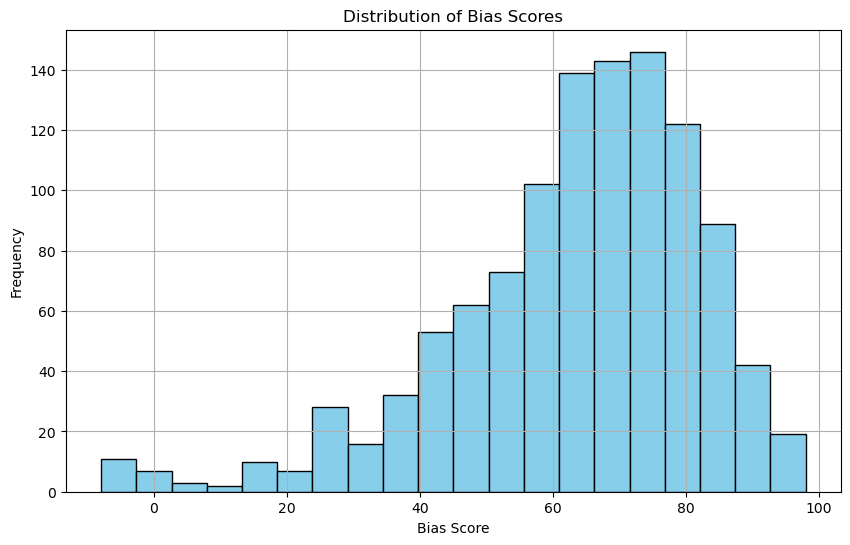

In [48]:
print(hospital_disparities_converted)

# Plot the distribution of bias scores
def plot_bias_score_distribution(hospital_disparities):
    bias_scores = []
    
    # Extract bias scores from racial and gender disparities
    for facility_id, facility_data in hospital_disparities.items():
        # Racial disparities
        for race, race_data in facility_data['racial_disparities'].items():
            bias_scores.append(race_data['bias_score'])
        
        # Gender disparities
        for gender, gender_data in facility_data['gender_disparities'].items():
            bias_scores.append(gender_data['bias_score'])
    
    # Create a histogram to show the distribution of bias scores
    plt.figure(figsize=(10, 6))
    plt.hist(bias_scores, bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Bias Scores')
    plt.xlabel('Bias Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot the distribution of bias scores
plot_bias_score_distribution(hospital_disparities_converted)